In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
# Load dataset (SMS Spam Dataset)
df = pd.read_csv("spam_sms.csv", names=["label", "message"])

# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head(20)

,label,message
0,0,free money on winzo
1,0,"Go until jurong point, crazy.. Available only ..."
2,0,Ok lar... Joking wif u oni...
3,1,Free entry in 2 a wkly comp to win FA Cup fina...
4,0,U dun say so early hor... U c already then say...
5,0,"Nah I don't think he goes to usf, he lives aro..."
6,1,FreeMsg Hey there darling it's been 3 week's n...
7,0,Even my brother is not like to speak with me. ...
8,0,As per your request 'Melle Melle (Oru Minnamin...
9,1,WINNER!! As a valued network customer you have...


In [12]:
vectorizer = CountVectorizer(stop_words='english')  # Convert text to numerical vectors
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.9721973094170404

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       964
           1       0.87      0.93      0.90       151

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115



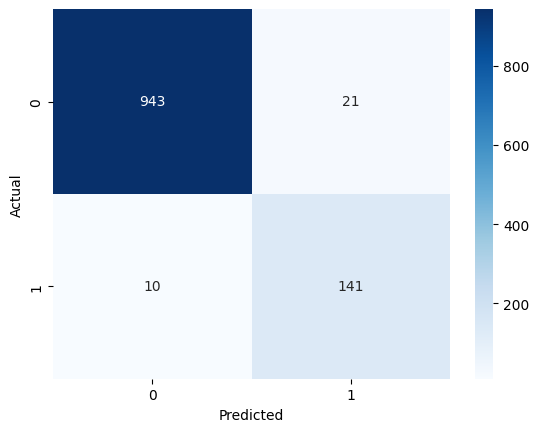

In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\sunny\.conda\envs\torch_env\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


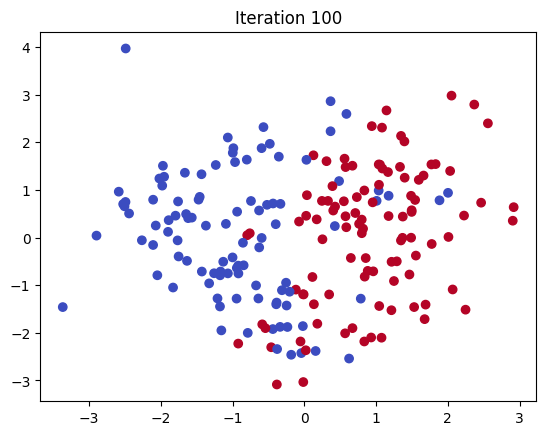

In [16]:
import matplotlib.animation as animation
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_informative=2, n_redundant=0, n_repeated=0, n_features=2, n_classes=2, random_state=42)
clf = GaussianNB()

fig, ax = plt.subplots()
sc = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

def update(frame):
    clf.fit(X[:frame+1], y[:frame+1])
    ax.clear()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    ax.set_title(f"Iteration {frame+1}")

ani = animation.FuncAnimation(fig, update, frames=100, interval=100)
ani.save("naive_bayes.gif", writer="pillow", fps=5)
plt.show()
